Z-Score Example:
Original data: [72, 75, 68, 80, 85, 65, 76, 79, 82, 71]
Mean: 75.30
Standard Deviation: 6.03
Z-scores: [-0.55, -0.05, -1.21, 0.78, 1.61, -1.71, 0.12, 0.61, 1.11, -0.71]

Percentage of data within:
±1 standard deviation: 68.27%
±2 standard deviations: 95.45%
±3 standard deviations: 99.73%


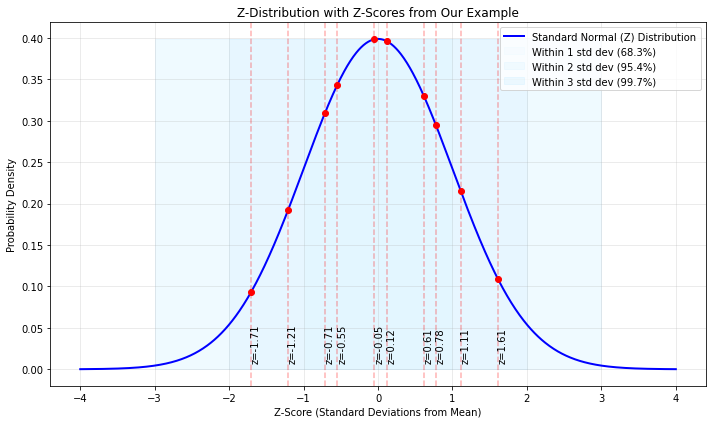

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data
data = [72, 75, 68, 80, 85, 65, 76, 79, 82, 71]

# Calculate z-scores
mean = np.mean(data)
std_dev = np.std(data, ddof=0)  # Population standard deviation
z_scores = [(x - mean) / std_dev for x in data]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the standard normal curve (z-distribution)
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, 'b-', lw=2, label='Standard Normal (Z) Distribution')

# Add vertical lines for each z-score
for i, z in enumerate(z_scores):
    plt.axvline(x=z, color='r', alpha=0.3, linestyle='--')
    plt.text(z, 0.01, f'z={z:.2f}', rotation=90)

# Highlight the data points on the curve
for z in z_scores:
    plt.plot(z, stats.norm.pdf(z, 0, 1), 'ro')

# Add shaded regions for standard deviations
colors = ['#e6f7ff', '#cceeff', '#b3e6ff']
for i in range(1, 4):
    plt.fill_between([-i, i], 0, stats.norm.pdf(0, 0, 1), alpha=0.2, color=colors[i-1],
                    label=f'Within {i} std dev ({stats.norm.cdf(i) - stats.norm.cdf(-i):.1%})')

plt.title('Z-Distribution with Z-Scores from Our Example')
plt.xlabel('Z-Score (Standard Deviations from Mean)')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.legend()

# Print summary statistics
print("Z-Score Example:")
print(f"Original data: {data}")
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Z-scores: {[round(z, 2) for z in z_scores]}")
print(f"\nPercentage of data within:")
print(f"±1 standard deviation: {stats.norm.cdf(1) - stats.norm.cdf(-1):.2%}")
print(f"±2 standard deviations: {stats.norm.cdf(2) - stats.norm.cdf(-2):.2%}")
print(f"±3 standard deviations: {stats.norm.cdf(3) - stats.norm.cdf(-3):.2%}")

plt.tight_layout()
plt.show()

T-Test Example:
Group 1: [72, 75, 68, 80, 85, 65, 76]
   Mean: 74.43
   Standard Deviation: 6.85
Group 2: [62, 68, 70, 75, 71, 60, 65]
   Mean: 67.29
   Standard Deviation: 5.28
T-statistic: 2.18
P-value: 0.0495
Degrees of freedom: 12
Critical t-value (α=0.05, two-tailed): ±2.18
Result: Reject null hypothesis (means are different)


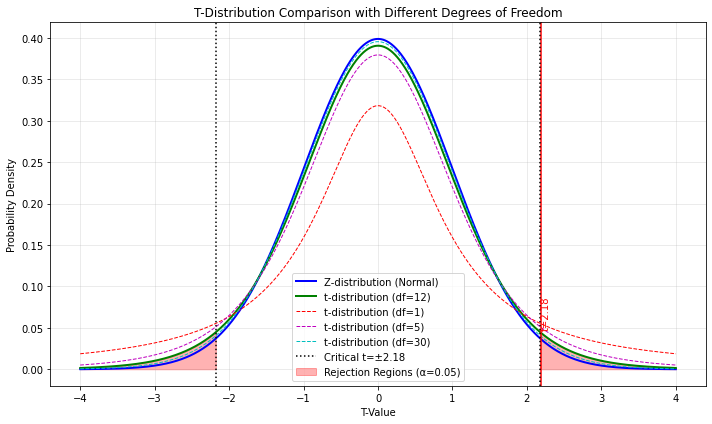

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data (small samples)
group1 = [72, 75, 68, 80, 85, 65, 76]
group2 = [62, 68, 70, 75, 71, 60, 65]

# Calculate t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
df = len(group1) + len(group2) - 2  # Degrees of freedom

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the t-distribution for different degrees of freedom
x = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x, df)  # t-distribution with our example's df
y_t1 = stats.t.pdf(x, 1)  # t with 1 degree of freedom (very heavy tails)
y_t5 = stats.t.pdf(x, 5)  # t with 5 degrees of freedom
y_t30 = stats.t.pdf(x, 30)  # t with 30 degrees of freedom (close to normal)
y_normal = stats.norm.pdf(x, 0, 1)  # standard normal for comparison

plt.plot(x, y_normal, 'b-', lw=2, label='Z-distribution (Normal)')
plt.plot(x, y_t, 'g-', lw=2, label=f't-distribution (df={df})')
plt.plot(x, y_t1, 'r--', lw=1, label='t-distribution (df=1)')
plt.plot(x, y_t5, 'm--', lw=1, label='t-distribution (df=5)')
plt.plot(x, y_t30, 'c--', lw=1, label='t-distribution (df=30)')

# Mark our t-statistic
plt.axvline(x=t_stat, color='r', linestyle='-')
plt.text(t_stat, 0.05, f't={t_stat:.2f}', rotation=90, color='r')

# Shade the rejection regions (two-tailed test at α=0.05)
critical_t = stats.t.ppf(0.975, df)  # Critical value for α=0.05 (two-tailed)
plt.axvline(x=critical_t, color='k', linestyle=':', label=f'Critical t=±{critical_t:.2f}')
plt.axvline(x=-critical_t, color='k', linestyle=':')

# Shade rejection regions
x_fill_right = np.linspace(critical_t, 4, 100)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, alpha=0.3, color='red')

x_fill_left = np.linspace(-4, -critical_t, 100)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, alpha=0.3, color='red', label='Rejection Regions (α=0.05)')

plt.title('T-Distribution Comparison with Different Degrees of Freedom')
plt.xlabel('T-Value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.legend()

# Print summary statistics
print("T-Test Example:")
print(f"Group 1: {group1}")
print(f"   Mean: {np.mean(group1):.2f}")
print(f"   Standard Deviation: {np.std(group1, ddof=1):.2f}")
print(f"Group 2: {group2}")
print(f"   Mean: {np.mean(group2):.2f}")
print(f"   Standard Deviation: {np.std(group2, ddof=1):.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {df}")
print(f"Critical t-value (α=0.05, two-tailed): ±{critical_t:.2f}")
print(f"Result: {'Reject null hypothesis (means are different)' if p_value < 0.05 else 'Fail to reject null hypothesis'}")

plt.tight_layout()
plt.show()

ANOVA F-Test Example:
Group 1: [72, 75, 68, 80, 85, 65, 76]
   Mean: 74.43
   Variance: 46.95
Group 2: [62, 68, 70, 75, 71, 60, 65]
   Mean: 67.29
   Variance: 27.90
Group 3: [80, 82, 84, 77, 81, 79, 83]
   Mean: 80.86
   Variance: 5.81

ANOVA Calculation:
Grand Mean: 74.19
Between-group sum of squares: 645.24
Within-group sum of squares: 484.00
Mean square between: 322.62
Mean square within: 26.89

F-statistic: 12.00
P-value: 0.0005
Degrees of freedom: df1=2, df2=18
Critical F-value (α=0.05): 3.55
Result: Reject null hypothesis (means are different)


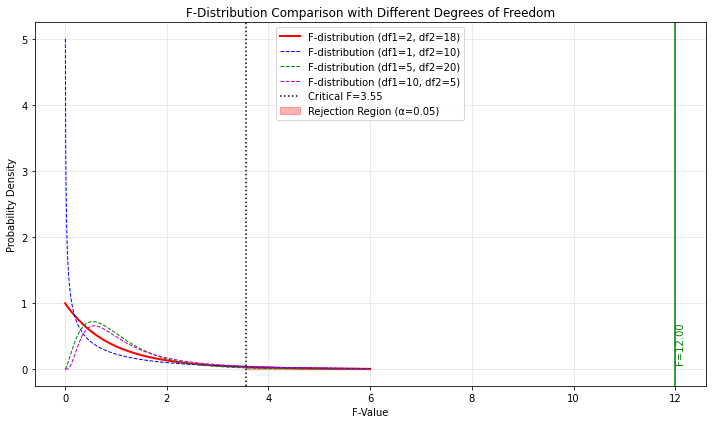

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data for ANOVA
group1 = [72, 75, 68, 80, 85, 65, 76]
group2 = [62, 68, 70, 75, 71, 60, 65]
group3 = [80, 82, 84, 77, 81, 79, 83]

# Calculate F-statistic
f_stat, p_value = stats.f_oneway(group1, group2, group3)
df1 = 3 - 1  # Between groups degrees of freedom (k-1)
df2 = len(group1) + len(group2) + len(group3) - 3  # Within groups degrees of freedom (N-k)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot F-distributions with different degrees of freedom
x = np.linspace(0, 6, 1000)  # F-distribution is only defined for positive values
y_f = stats.f.pdf(x, df1, df2)  # Our example's F distribution
y_f_1_10 = stats.f.pdf(x, 1, 10)  # Example with df1=1, df2=10
y_f_5_20 = stats.f.pdf(x, 5, 20)  # Example with df1=5, df2=20
y_f_10_5 = stats.f.pdf(x, 10, 5)  # Example with df1=10, df2=5

plt.plot(x, y_f, 'r-', lw=2, label=f'F-distribution (df1={df1}, df2={df2})')
plt.plot(x, y_f_1_10, 'b--', lw=1, label='F-distribution (df1=1, df2=10)')
plt.plot(x, y_f_5_20, 'g--', lw=1, label='F-distribution (df1=5, df2=20)')
plt.plot(x, y_f_10_5, 'm--', lw=1, label='F-distribution (df1=10, df2=5)')

# Mark our F-statistic
plt.axvline(x=f_stat, color='g', linestyle='-')
plt.text(f_stat, 0.1, f'F={f_stat:.2f}', rotation=90, color='g')

# Shade the rejection region (α=0.05)
critical_f = stats.f.ppf(0.95, df1, df2)  # Critical value for α=0.05
plt.axvline(x=critical_f, color='k', linestyle=':', label=f'Critical F={critical_f:.2f}')

x_fill = np.linspace(critical_f, 6, 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='red', label='Rejection Region (α=0.05)')

plt.title('F-Distribution Comparison with Different Degrees of Freedom')
plt.xlabel('F-Value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.legend()

# Print group statistics
print("ANOVA F-Test Example:")
groups = [group1, group2, group3]
for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")
    print(f"   Mean: {np.mean(group):.2f}")
    print(f"   Variance: {np.var(group, ddof=1):.2f}")

# Calculate between-group and within-group variances
all_data = group1 + group2 + group3
grand_mean = np.mean(all_data)
group_means = [np.mean(group) for group in groups]
n = len(all_data)
k = len(groups)

# Between-group sum of squares
ss_between = sum(len(group) * (mean - grand_mean)**2 for group, mean in zip(groups, group_means))

# Within-group sum of squares
ss_within = sum(sum((x - group_mean)**2 for x in group) for group, group_mean in zip(groups, group_means))

# Mean squares
ms_between = ss_between / df1
ms_within = ss_within / df2

# F-statistic calculation
f_calc = ms_between / ms_within

print("\nANOVA Calculation:")
print(f"Grand Mean: {grand_mean:.2f}")
print(f"Between-group sum of squares: {ss_between:.2f}")
print(f"Within-group sum of squares: {ss_within:.2f}")
print(f"Mean square between: {ms_between:.2f}")
print(f"Mean square within: {ms_within:.2f}")
print(f"\nF-statistic: {f_calc:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: df1={df1}, df2={df2}")
print(f"Critical F-value (α=0.05): {critical_f:.2f}")
print(f"Result: {'Reject null hypothesis (means are different)' if p_value < 0.05 else 'Fail to reject null hypothesis'}")

plt.tight_layout()
plt.show()